# Access the Tools located in TextbookSimulations

In [1]:
using TextbookSimulations

# Solve a Power-Flow Problem using PowerModels.jl

Read in data from a MATPOWER case file, solve the AC power-flow study using Los Alamos National Laboratory's (LANL's) `PowerModels.jl`, and present the resulting bus- and line-level solutions. The data in this example describes a small system that changes its generation and demand throughout the day.

This system includes a clean firm source (represented by the slack bus), two solar farms and one wind farm (represented with PV busses), and a central load.

This system contains two solar farms and one wind farm, represented by PV buses, one source of firm generation, represented by the slack bus, and one central load, represented by a PQ bus. The slack bus, as a source of firm generation, offsets the amount of power not able to be generated by the more variable renewable sources of power, and is a low-carbon source of power. The four power flows for this system represent the system in the morning, at around 7:30 am, when there is a medium-high load, the middle of the day, at around 12:30 pm, when the load is lighter, the evening, at around 6:30 pm, when the load is the highest, and the middle of the night, at around 2:30 am, when the load is the lightest. The power produced by the solar and wind farms also changes at each time of day to reflect the daily variability of a solar or wind farm.


# Renewables and Firm Source System in the Morning (~7:30 AM)

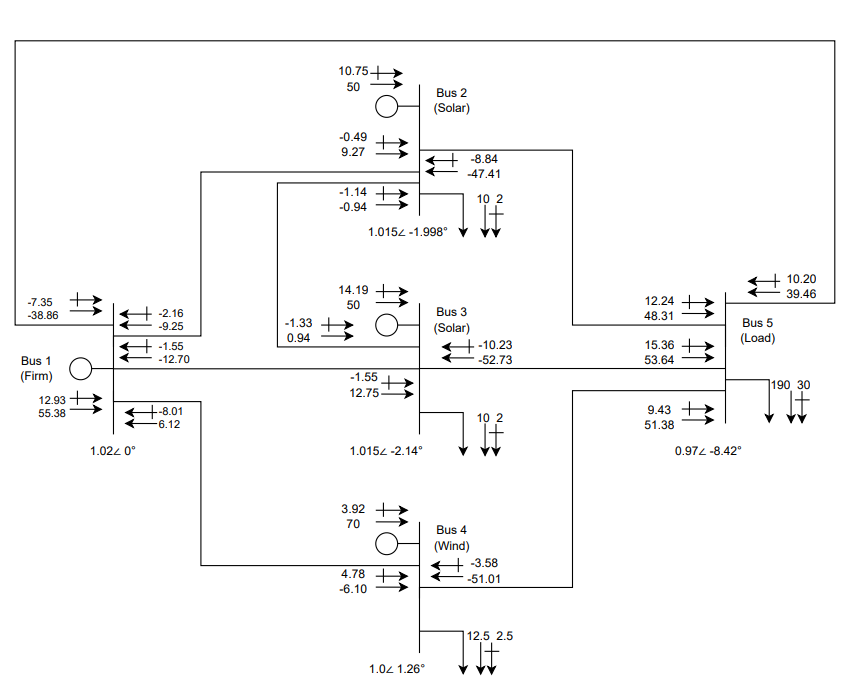

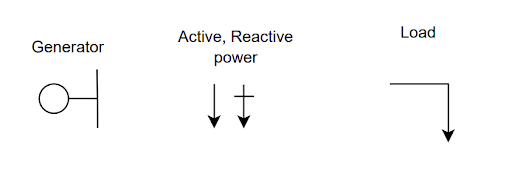

In [29]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)


[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [30]:
# Solve the power-flow problem

result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 3.408

In [31]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,55.3817,12.934,0.0,0.0
2,2,PV,1.015,-1.99808,50.0,10.7521,10.0,2.0
3,3,PV,1.015,-2.13717,50.0,14.1888,10.0,2.0
4,4,PV,1.0,1.26393,70.0,3.91916,12.5,2.5
5,5,PQ,0.971739,-8.42286,0.0,0.0,190.0,30.0


In [32]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,9.26509,-9.24892,0.0161781,-0.493864,-2.16085,-2.65472
2,1,3,12.7546,-12.7013,0.0532881,-1.55243,-2.02996,-3.58239
3,1,5,39.4637,-38.8592,0.604517,10.1963,-7.35484,2.84142
4,1,4,-6.10178,6.12262,0.0208331,4.78407,-8.01095,-3.22688
5,2,3,0.941397,-0.941174,0.000222868,-1.32693,-1.14332,-2.47025
6,2,5,48.3075,-47.4051,0.902408,12.2399,-8.83648,3.40344
7,3,5,53.6425,-52.7268,0.915719,15.3621,-10.2279,5.13418
8,4,5,51.3774,-51.0089,0.368486,9.43011,-3.58074,5.84937


# Renewables and Firm Source System Midday (~12:30 PM)

Increased solar generation, lower load and wind generation

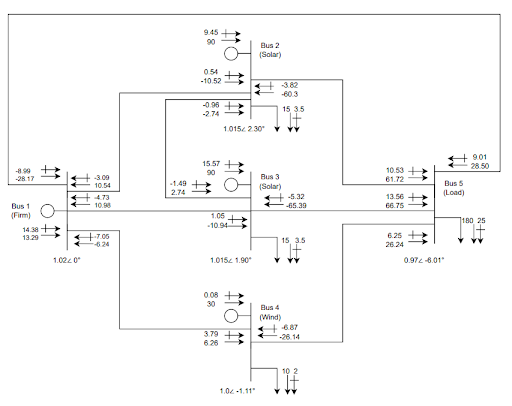

In [33]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [34]:
#Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(0.035, 2, network_data)
change_bus_reactive_power_demand!(0.035, 3, network_data)
change_bus_reactive_power_demand!(0.02, 4, network_data)
change_bus_reactive_power_demand!(0.25, 5, network_data)

0.25

In [35]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5 
change_bus_real_power_demand!(0.15, 2, network_data)
change_bus_real_power_demand!(0.15, 3, network_data)
change_bus_real_power_demand!(0.1, 4, network_data)
change_bus_real_power_demand!(1.8, 5, network_data)

1.8

In [36]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(0.9, 2, network_data)
change_bus_real_power_generation!(0.9, 3, network_data)
change_bus_real_power_generation!(0.3, 4, network_data)

0.3

In [37]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.0

In [38]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,13.2908,14.3815,0.0,0.0
2,2,PV,1.015,2.3037,90.0,9.45332,15.0,3.5
3,3,PV,1.015,1.89919,90.0,11.3715,15.0,3.5
4,4,PV,1.0,-1.10974,30.0,1.20629,10.0,2.0
5,5,PQ,0.975003,-6.00567,0.0,0.0,180.0,25.0


In [39]:
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,-10.5235,10.5449,0.0214012,0.538123,-3.08727,-2.54915
2,1,3,-10.9406,10.9829,0.0422733,1.05023,-4.73101,-3.68079
3,1,5,28.4975,-28.1676,0.329943,9.00777,-8.99112,0.0166534
4,1,4,6.25745,-6.23926,0.0181902,3.78536,-7.0455,-3.26014
5,2,3,2.73834,-2.73646,0.0018849,-1.49359,-0.959627,-2.45321
6,2,5,61.7167,-60.3007,1.41607,10.5342,-3.81887,6.71531
7,3,5,66.7535,-65.3925,1.36101,13.5622,-5.32095,8.24122
8,4,5,26.2393,-26.1392,0.10004,6.2518,-6.86906,-0.61726


# Renewables and Firm Source System in the Evening (~6:30 PM)

Increased load and wind generation, lower solar generation

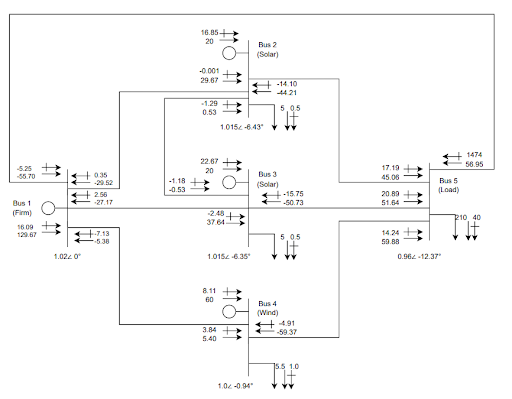

In [40]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [41]:
#Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(0.005, 2, network_data)
change_bus_reactive_power_demand!(0.005, 3, network_data)
change_bus_reactive_power_demand!(0.01, 4, network_data)
change_bus_reactive_power_demand!(0.4, 5, network_data)

0.4

In [42]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_real_power_demand!(0.05, 2, network_data)
change_bus_real_power_demand!(0.05, 3, network_data)
change_bus_real_power_demand!(0.055, 4, network_data)
change_bus_real_power_demand!(2.1, 5, network_data)

2.1

In [43]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(0.2, 2, network_data)
change_bus_real_power_generation!(0.2, 3, network_data)
change_bus_real_power_generation!(0.6, 4, network_data)

0.6

In [44]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.000999928

In [45]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,129.671,16.093,0.0,0.0
2,2,PV,1.015,-6.43269,20.0,16.8527,5.0,0.5
3,3,PV,1.015,-6.35365,20.0,22.6686,5.0,0.5
4,4,PV,1.0,-0.944993,60.0,8.11268,5.5,1.0
5,5,PQ,0.960317,-12.367,0.0,0.0,210.0,40.0


In [46]:
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,29.6862,-29.5216,0.164576,-0.00088522,0.34552,0.344635
2,1,3,37.6383,-37.1749,0.463427,-2.48302,2.56453,0.0815067
3,1,5,56.9478,-55.6981,1.24978,14.7388,-5.2469,9.49188
4,1,4,5.39842,-5.38267,0.0157457,3.83814,-7.12904,-3.29091
5,2,3,-0.53483,0.534902,7.19606e-5,-1.18374,-1.28807,-2.4718
6,2,5,45.0565,-44.2062,0.850305,17.191,-14.0971,3.09385
7,3,5,51.64,-50.7251,0.914825,20.8921,-15.75,5.14206
8,4,5,59.8827,-59.3707,0.512014,14.2417,-4.90596,9.33577


# Renewables and Firm Source System at Night (~2:30 AM)

Lowest load, no solar generation, increased wind generation

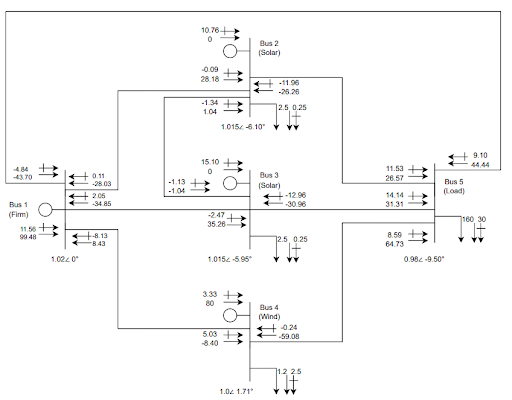

In [47]:
# Define the data directory and case name
file_path = joinpath(@__DIR__, "..", "data")
case_name = "renewable_firm_data"
file_type = ".m"

# Load the network data
network_data = load_network_data(file_path, case_name, file_type)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 2: Float64[]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "renewable_firm_data"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("ncost"=>0, "qc1…
  "branch"         => Dict{String, Any}("8"=>Dict{String, Any}("br_r"=>0.01335,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [48]:
# Change the reactive power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_reactive_power_demand!(0.0025, 2, network_data)
change_bus_reactive_power_demand!(0.0025, 3, network_data)
change_bus_reactive_power_demand!(0.025, 4, network_data)
change_bus_reactive_power_demand!(0.3, 5, network_data)

0.3

In [49]:
#Change the active power demand of the solar farms at bus 2 and 3, the wind farm at bus 4, and the load at bus 5
change_bus_real_power_demand!(0.025, 2, network_data)
change_bus_real_power_demand!(0.025, 3, network_data)
change_bus_real_power_demand!(0.12, 4, network_data)
change_bus_real_power_demand!(1.6, 5, network_data)

1.6

In [50]:
#Change the active power generation of the solar farms at bus 2 and 3 and the wind farm at bus 4
change_bus_real_power_generation!(0, 2, network_data)
change_bus_real_power_generation!(0, 3, network_data)
change_bus_real_power_generation!(0.8, 4, network_data)

0.8

In [51]:
# Solve the power-flow problem
result = compute_ac_pf(network_data)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.0079999

In [52]:
# Print bus-level results
bus_results = organize_bus_results(result, network_data)

Row,Bus Number,Bus Type,Voltage Magnitude (p.u.),Voltage Angle (degrees),Real Power Generated (MW),Reactive Power Generated (MVAR),Real Power Load (MW),Reactive Power Load (MVAR)
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64
1,1,Slack,1.02,0.0,99.4806,11.561,0.0,0.0
2,2,PV,1.015,-6.10497,0.0,10.755,2.5,0.25
3,3,PV,1.015,-5.95088,0.0,15.0997,2.5,0.25
4,4,PV,1.0,1.7066,80.0,3.32541,12.0,2.5
5,5,PQ,0.97693,-9.50039,0.0,0.0,160.0,30.0


In [53]:
# Print line-level results
line_results = organize_line_results(result, network_data)

Row,Bus i,Bus j,Real Power Flow from Bus i to Bus j (MW),Real Power Flow from Bus j to Bus i (MW),Real Power Flow Losses (MW),Reactive Power Flow from Bus i to Bus j (MVAR),Reactive Power Flow from Bus j to Bus i (MVAR),Reactive Power Flow Losses (MVAR)
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,28.179,-28.0307,0.148281,-0.0913893,0.106679,0.0152896
2,1,3,35.2592,-34.8525,0.406697,-2.47327,2.04799,-0.425279
3,1,5,44.444,-43.6998,0.74419,9.09875,-4.84296,4.25579
4,1,4,-8.40156,8.43189,0.0303282,5.02693,-8.1343,-3.10737
5,2,3,-1.04263,1.04291,0.000273516,-1.13317,-1.33657,-2.46974
6,2,5,26.5733,-26.2613,0.312015,11.5315,-11.9561,-0.424589
7,3,5,31.3096,-30.9592,0.350386,14.1383,-12.9604,1.17789
8,4,5,59.5681,-59.0797,0.488452,8.9597,-0.240556,8.71914
